<a href="https://colab.research.google.com/github/goyaljai1/Data_Analysis_Projects/blob/main/Case_Study_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#YouTube Channel Dataset

In [2]:
#importing dataset from kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d rahuldogra/top5000youtubechannels

100% 128k/128k [00:00<00:00, 747kB/s]
100% 128k/128k [00:00<00:00, 745kB/s]


In [4]:
!unzip "top5000youtubechannels.zip"

Archive:  top5000youtubechannels.zip
  inflating: top-5000-youtube-channels.csv  


In [5]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#loading the dataframe
df = pd.read_csv("top-5000-youtube-channels.csv")

In [9]:
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [10]:
#show all rows except last 5 rows using head method
df.head(-5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
...,...,...,...,...,...,...
4990,"4,991st",B+,Ho Ngoc Ha's Official Channel,208,--,127185704
4991,"4,992nd",B+,Toys to Learn Colors,11,663114,141933264
4992,"4,993rd",B+,КАZКА,25,131766,74304638
4993,"4,994th",B+,United CUBE (CUBE Entertainment…,1055,1586835,371299166


In [11]:
#info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [15]:
#overall statistics
pd.options.display.float_format = '{:.2f}'.format #to convert the data representation from exponential to decimal type format
df.describe()

,Video views
count,5000.00
mean,1071449400.15
std,2003843972.12
min,75.00
25%,186232945.75
50%,482054780.00
75%,1124367826.75
max,47548839843.00


In [22]:
#replace "--" to NaN
df['Subscribers'].replace('--', np.nan, inplace = True, regex = True)

In [23]:
df.head(20)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307


In [24]:
#checking null values
df.isnull().sum()

Rank               0
Grade              0
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64

In [25]:
#percentage missing data
df.isnull().sum()*100/len(df)

Rank            0.00
Grade           0.00
Channel name    0.00
Video Uploads   0.12
Subscribers     7.74
Video views     0.00
dtype: float64

<Axes: >

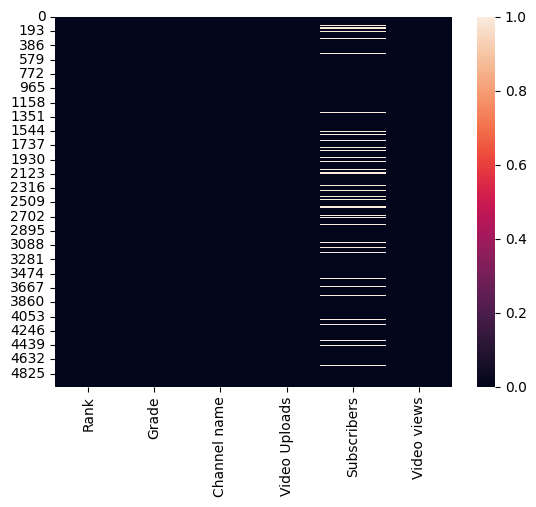

In [27]:
#visualizing missing data
sns.heatmap(df.isnull())

In [28]:
#drop missing values
df.dropna(axis = 0, inplace = True)
df.shape

(4610, 6)

In [29]:
#cleaning data of rank column
df.dtypes

Rank             object
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

In [32]:
df['Rank'] = df['Rank'].str[0:-2]
df['Rank'].replace(',', '', regex = True, inplace = True)
df.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,4996,B+,Uras Benlioğlu,706,2072942,441202795
4996,4997,B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,4998,B+,Mastersaint,110,3265735,311758426
4998,4999,B+,Bruce McIntosh,3475,32990,14563764
4999,5000,B+,SehatAQUA,254,21172,73312511


In [36]:
#converting dtype of relevent columns from object to int64
cols = df.columns.drop(['Channel name', 'Grade'])
df[cols] = df[cols].apply(pd.to_numeric)

In [37]:
df.dtypes

Rank              int64
Grade            object
Channel name     object
Video Uploads     int64
Subscribers       int64
Video views       int64
dtype: object

In [38]:
#data cleaning for grade column
df['Grade'].value_counts()

B+      2722
A-       941
A        897
A+        40
A++       10
Name: Grade, dtype: int64

In [41]:
df['Grade'].unique()

array(['A++ ', 'A+ ', 'A ', 'A- ', 'B+ '], dtype=object)

In [64]:
#encoding ordinal categorical data of the column
df['Grade'] = df['Grade'].map({'A++ ' : 5, 'A+ ' : 4, 'A ' : 3, 'A- ' : 2, 'B+ ' : 1})
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Average_Views
0,1,5,Zee TV,82757,18752951,20869786591,252181.53
1,2,5,T-Series,12661,61196302,47548839843,3755535.89
2,3,5,Cocomelon - Nursery Rhymes,373,19238251,9793305082,26255509.60
3,4,5,SET India,27323,31180559,22675948293,829921.62
4,5,5,WWE,36756,32852346,26273668433,714813.05


In [65]:
#average view of each channel
df['Average_Views'] = df['Video views']/df['Video Uploads']
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Average_Views
0,1,5,Zee TV,82757,18752951,20869786591,252181.53
1,2,5,T-Series,12661,61196302,47548839843,3755535.89
2,3,5,Cocomelon - Nursery Rhymes,373,19238251,9793305082,26255509.60
3,4,5,SET India,27323,31180559,22675948293,829921.62
4,5,5,WWE,36756,32852346,26273668433,714813.05


In [66]:
#top 5 channels with maximum number of video uploads
df.sort_values(by = 'Video Uploads', ascending = False).head()['Channel name']

3453    AP Archive
1149      YTN NEWS
2223     SBS Drama
323       GMA News
2956           MLB
Name: Channel name, dtype: object

In [67]:
#correlation matrix
df.corr()

<ipython-input-67-109926aaf014>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rank,Grade,Video Uploads,Subscribers,Video views,Average_Views
Rank,1.00,-0.87,-0.07,-0.38,-0.40,-0.15
Grade,-0.87,1.00,0.09,0.43,0.48,0.16
Video Uploads,-0.07,0.09,1.00,0.01,0.09,-0.06
Subscribers,-0.38,0.43,0.01,1.00,0.79,0.29
Video views,-0.40,0.48,0.09,0.79,1.00,0.29
Average_Views,-0.15,0.16,-0.06,0.29,0.29,1.00


<Axes: xlabel='Grade', ylabel='Video Uploads'>

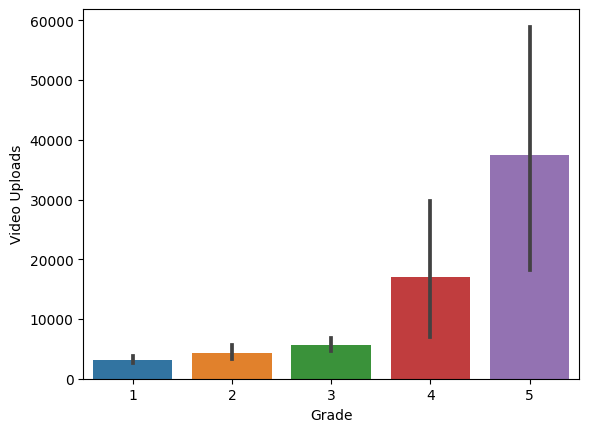

In [68]:
#which grade has a maximum number of video uploads
sns.barplot(data = df, x = 'Grade', y = 'Video Uploads')

<Axes: xlabel='Grade', ylabel='Average_Views'>

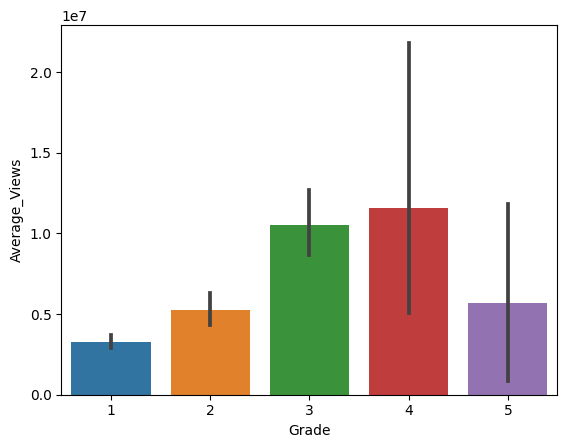

In [69]:
#Grade having highest average views
sns.barplot(data = df, x = 'Grade', y = 'Average_Views')

In [71]:
#Grade having highest number of subscribers
df.groupby('Grade')['Subscribers'].sum().idxmax()

3

In [74]:
df.groupby('Grade')['Subscribers'].sum()

Grade
1    4178836032
2    2633407673
3    4581101256
4     469077899
5     222817625
Name: Subscribers, dtype: int64

<Axes: xlabel='Grade', ylabel='Subscribers'>

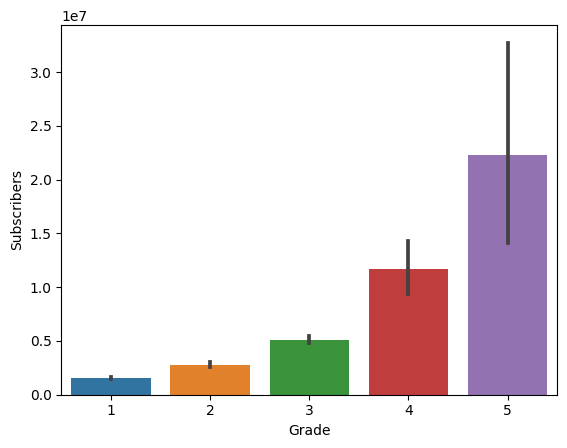

In [75]:
sns.barplot(data = df, x = 'Grade', y = 'Subscribers')